In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Libraries

In [2]:
import time

# importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import special, stats

# preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


# model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold, cross_val_score


# SMOTe
from imblearn.over_sampling import SMOTE

# models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


# metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, average_precision_score, precision_recall_curve 
from sklearn.metrics import recall_score, roc_curve, roc_auc_score, precision_recall_curve, auc
# from sklearn.metrics import plot_confusion_matrix

# ensemble
from xgboost import XGBClassifier

# warnings
import warnings
warnings.filterwarnings("ignore")

# style
import matplotlib.style as style
style.use('fivethirtyeight')

In [3]:
df = pd.read_csv('bank-additional-full.csv', sep=';')

In [4]:
df.shape

(41188, 21)

In [5]:
df.head(2)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# Data Dictionary

| Input variables:                                         |                                                                                                                                                                                                                                                                                                                                                                                                                              |                                                                |   |
|----------------------------------------------------------|------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|----------------------------------------------------------------|---|
| # bank client data:                                      |                                                                                                                                                                                                                                                                                                                                                                                                                              |                                                                |   |
| 1                                                        | age (numeric)                                                                                                                                                                                                                                                                                                                                                                                                                |                                                                |   |
| 2                                                        | job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')                                                                                                                                                                                                                                           |                                                                |   |
| 3                                                        | marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)                                                                                                                                                                                                                                                                                                  |                                                                |   |
| 4                                                        | education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')                                                                                                                                                                                                                                                                                     |                                                                |   |
| 5                                                        | default: has credit in default? (categorical: 'no','yes','unknown')                                                                                                                                                                                                                                                                                                                                                          |                                                                |   |
| 6                                                        | housing: has housing loan? (categorical: 'no','yes','unknown')                                                                                                                                                                                                                                                                                                                                                               |                                                                |   |
| 7                                                        | loan: has personal loan? (categorical: 'no','yes','unknown')                                                                                                                                                                                                                                                                                                                                                                 |                                                                |   |
| # related with the last contact of the current campaign: |                                                                                                                                                                                                                                                                                                                                                                                                                              |                                                                |   |
| 8                                                        | contact: contact communication type (categorical: 'cellular','telephone')                                                                                                                                                                                                                                                                                                                                                    |                                                                |   |
| 9                                                        | month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')                                                                                                                                                                                                                                                                                                                                      |                                                                |   |
| 10                                                       | day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')                                                                                                                                                                                                                                                                                                                                       |                                                                |   |
| 11                                                       | duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model. |                                                                |   |
| # other attributes:                                      |                                                                                                                                                                                                                                                                                                                                                                                                                              |                                                                |   |
| 12                                                       | campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)                                                                                                                                                                                                                                                                                                             |                                                                |   |
| 13                                                       | pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)                                                                                                                                                                                                                                                                   |                                                                |   |
| 14                                                       | previous: number of contacts performed before this campaign and for this client (numeric)                                                                                                                                                                                                                                                                                                                                    |                                                                |   |
| 15                                                       | poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')                                                                                                                                                                                                                                                                                                                        |                                                                |   |
| # social and economic context attributes                 |                                                                                                                                                                                                                                                                                                                                                                                                                              |                                                                |   |
| 16                                                       | emp.var.rate: employment variation rate                                                                                                                                                                                                                                                                                                                                                                                      | quarterly indicator (numeric)                                  |   |
| 17                                                       | cons.price.idx: consumer price index                                                                                                                                                                                                                                                                                                                                                                                         | monthly indicator (numeric)                                    |   |
| 18                                                       | cons.conf.idx: consumer confidence index                                                                                                                                                                                                                                                                                                                                                                                     | monthly indicator (numeric)                                    |   |
| 19                                                       | euribor3m: euribor 3 month rate                                                                                                                                                                                                                                                                                                                                                                                              | daily indicator (numeric)                                      |   |
| 20                                                       | nr.employed: number of employees                                                                                                                                                                                                                                                                                                                                                                                             | quarterly indicator (numeric)                                  |   |
| Output variable (desired target):                        |                                                                                                                                                                                                                                                                                                                                                                                                                              |                                                                |   |
| 21                                                       | y                                                                                                                                                                                                                                                                                                                                                                                                                            | has the client subscribed a term deposit? (binary: 'yes','no') |   |

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [7]:
# Check for null values if any

# This method shows the count of null values, percent and dataTypes

def missing_data(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
        
    tt['Types'] = types
    return(np.transpose(tt))

In [8]:
missing_data(df)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
Total,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Types,int64,object,object,object,object,object,object,object,object,object,...,int64,int64,int64,object,float64,float64,float64,float64,float64,object


# How many term depositors are there in the data ?

In [9]:
df['y'].value_counts()

y
no     36548
yes     4640
Name: count, dtype: int64

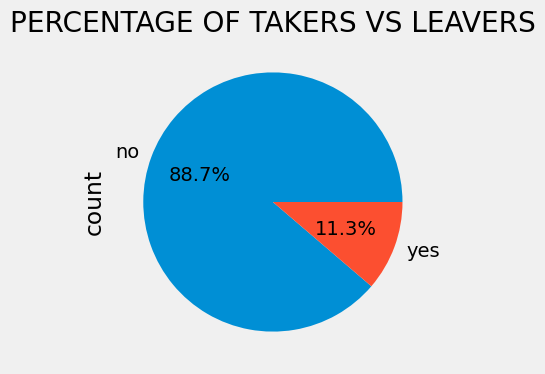

In [10]:
def plot_pie(dataset, target, size=(4,4)):
    return dataset[target].value_counts().plot.pie(autopct = '%1.1f%%', figsize=size)

plot_pie(df, 'y')
plt.title("PERCENTAGE OF TAKERS VS LEAVERS")
plt.show()

# What is the baseline likelihood of term deposits ? This tells us what is the success rate in the absence of ML model

In [11]:
# create a new variable `target` that takes 1 for `yes` else 0
df['target'] = np.where(df['y'].isin(['yes']), 1, 0)

df.head(2)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,target
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0


In [12]:
df['target'].mean()

0.11265417111780131

### In a no model scenario, out of 100 calls, _11 are taking the term loan_

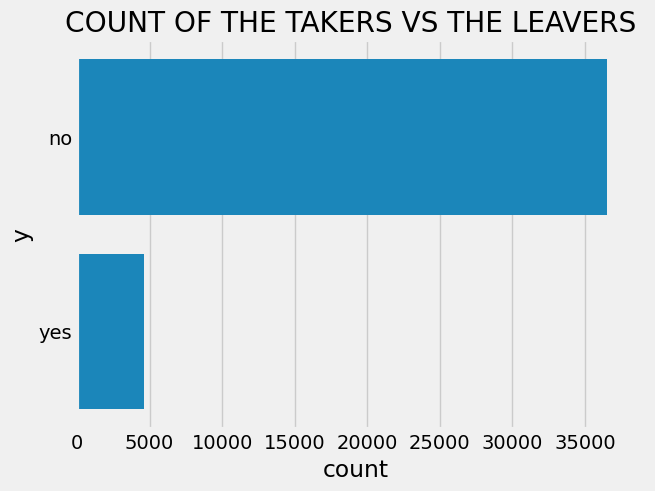

<Figure size 500x300 with 0 Axes>

In [13]:
sns.countplot(df['y'])
plt.title('COUNT OF THE TAKERS VS THE LEAVERS ')
plt.figure(figsize= (5,3))
plt.show()

# Inspecting Categorical variables

# 1. education

In [14]:
df['education'].value_counts()

education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: count, dtype: int64

education
basic.4y               0.102490
basic.6y               0.082024
basic.9y               0.078246
high.school            0.108355
illiterate             0.222222
professional.course    0.113485
university.degree      0.137245
unknown                0.145003
Name: target, dtype: float64


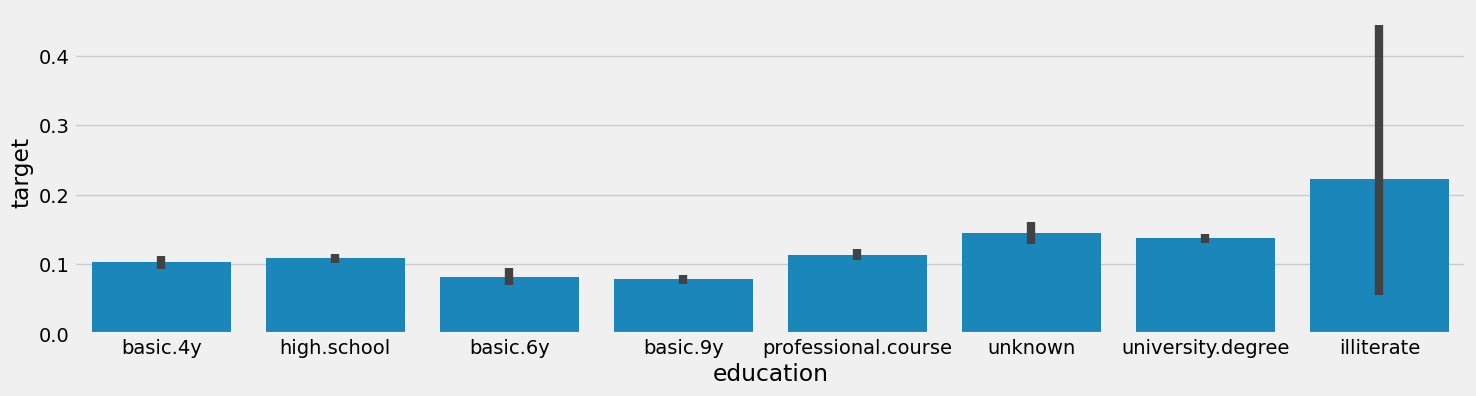

<Figure size 700x300 with 0 Axes>

In [15]:
# We will plot the relationship of `education` with `target`
# estimator is mean to show the likelihood of taking up the loan
def barplot_mean(x, y, df, hue=None, order=None, hue_order=None):
    print(df.groupby(x)[y].mean())
    uniqs = df[x].nunique()
    
    if uniqs > 4:
        plt.figure(figsize=(16,4))
        
    sns.barplot(x=x, y=y, data=df, estimator=np.mean, hue=hue, order=order, hue_order=hue_order)
    # plt.title('BAR GRAPH')
    plt.figure(figsize= (7,3))
    plt.show()

barplot_mean('education', 'target', df)



 `university.degree` and `professional.course` are a little better than the avg. success rate of the data

 `illiterate` and `unknown` is showing high chances of taking a loan (comparing to 0.112..), but we do not want to target such audience in the practical scenario. Always analyze graphs with practical perspective !

In [16]:
# We will group the basic education groups into one
basic_grps = ['basic.4y', 'basic.6y', 'basic.9y']

df['education'] = np.where(df['education'].isin(basic_grps), 'Basic', df['education'])

### we will also go ahead and merge `unknown` and `illiterate` into one

In [17]:
df['education'] = np.where(df['education'].isin(['illiterate']), 'unknown', df['education'])

### There is no monotonic trend visible that accounts for the discrmination of the target variable. We will be doing similar analysis for other variables as well

# 2. job

job
admin.           0.129726
blue-collar      0.068943
entrepreneur     0.085165
housemaid        0.100000
management       0.112175
retired          0.252326
self-employed    0.104856
services         0.081381
student          0.314286
technician       0.108260
unemployed       0.142012
unknown          0.112121
Name: target, dtype: float64


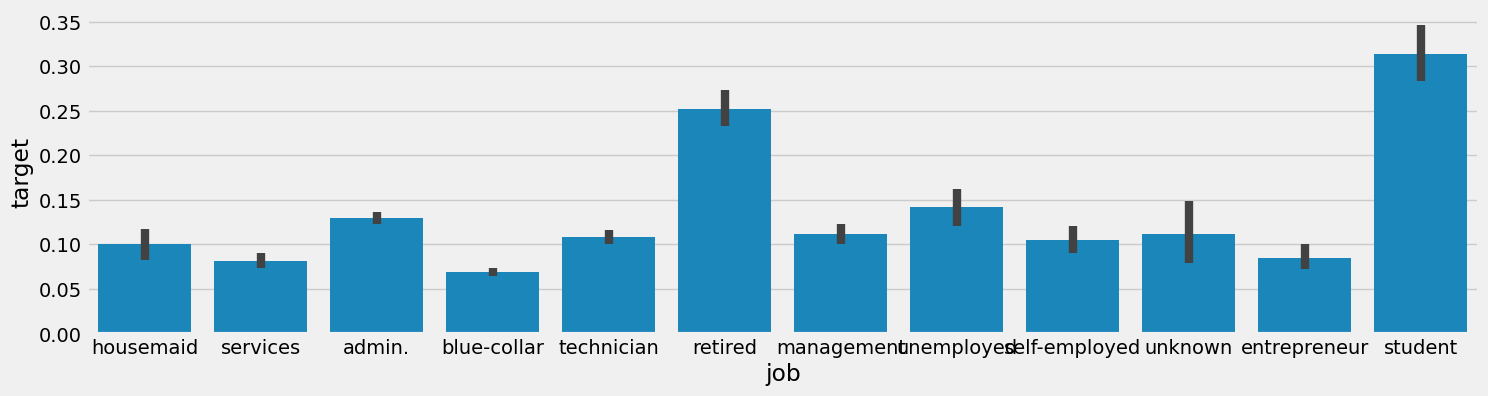

<Figure size 700x300 with 0 Axes>

In [18]:
barplot_mean('job', 'target', df)

### It appears as if `student` and `retired` people have very high chances of taking a term loan. We can also go ahead and group `unknown` and `unemployed` into one bucket

In [19]:
df['job'] = np.where(df['job'].isin(['unknown']), 'unemployed', df['job'])

# 4.marital_status 

marital
divorced    0.103209
married     0.101573
single      0.140041
unknown     0.150000
Name: target, dtype: float64


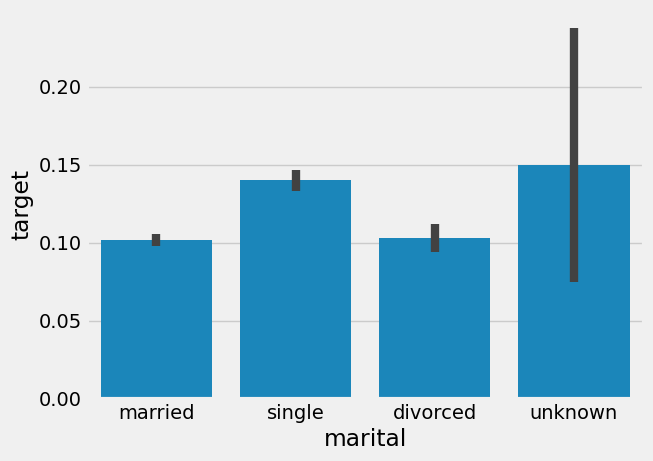

<Figure size 700x300 with 0 Axes>

In [20]:
barplot_mean('marital', 'target', df)

### We see there is no significant difference in the trend for different marital status so we can conclude that this is a weak predictor of the dependent target

# 5. default

default
no         0.12879
unknown    0.05153
yes        0.00000
Name: target, dtype: float64


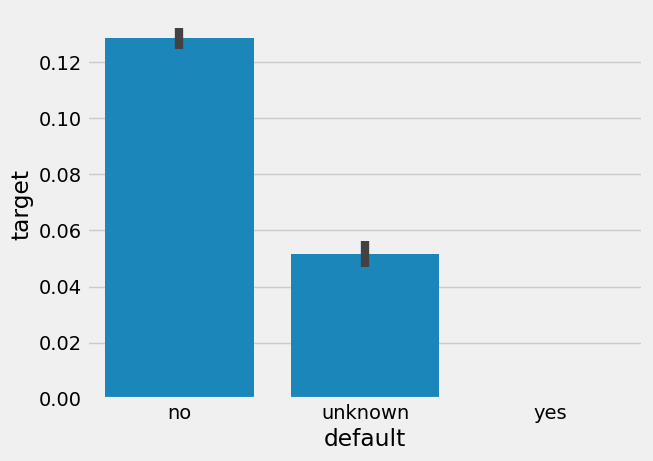

<Figure size 700x300 with 0 Axes>

In [21]:
barplot_mean('default', 'target', df)

### We see a trend in case of `default`. A person having `default` is having the mean as `0`. We will inspect this by doing the sum

In [22]:
print(df.groupby('default')['target'].sum())
print("*"*30)
# if we look at the count - we do have 3 cases of people who have `defaulted`
print(df.groupby('default')['target'].count())

# But we do have cases of `unknown`. 
# We can go ahead and group them in `yes` 
# because we are not sure which category they belong to

default
no         4197
unknown     443
yes           0
Name: target, dtype: int32
******************************
default
no         32588
unknown     8597
yes            3
Name: target, dtype: int64


In [23]:
df['default'] = np.where(df['default'].isin(['unknown']), 'yes', df['default'])

### This is a very good variable to design the audience which can be utilised later since it is able to discriminate the dependent target variable. 

### Note: As a predictor, this is also weak because the likelihood of a person with `no default` buying a term loan is only `12.87 %` 

# 6. housing

housing
no         0.108796
unknown    0.108081
yes        0.116194
Name: target, dtype: float64


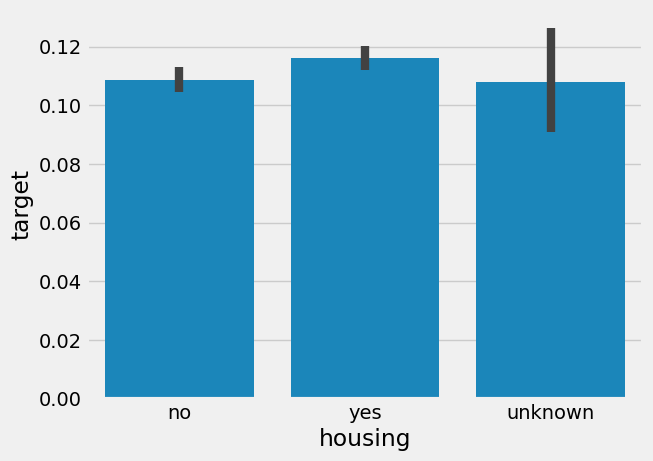

<Figure size 700x300 with 0 Axes>

In [24]:
barplot_mean('housing', 'target', df)

### We see there is no significant difference in the trend for different housing loan status so we can conclude that this is a weak predictor of the dependent target

# 7. loan

loan
no         0.113402
unknown    0.108081
yes        0.109315
Name: target, dtype: float64


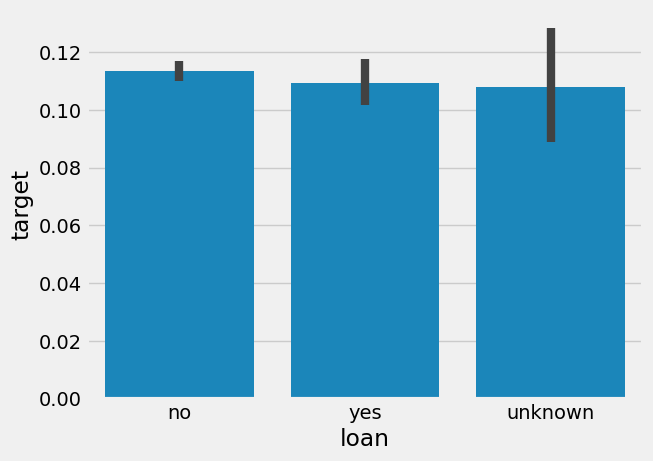

<Figure size 700x300 with 0 Axes>

In [25]:
barplot_mean('loan', 'target', df)

### We see there is no significant difference in the trend for different personal loan status so we can conclude that this is a weak predictor of the dependent target

# 8. contact

contact
cellular     0.147376
telephone    0.052313
Name: target, dtype: float64


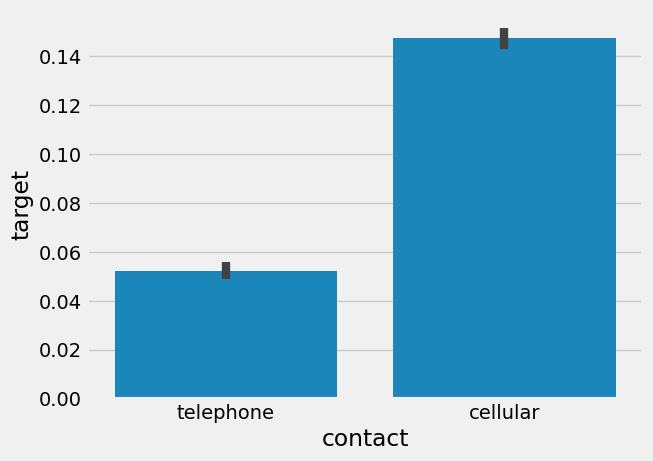

<Figure size 700x300 with 0 Axes>

In [26]:
barplot_mean('contact', 'target', df)

### This is a very good variable to design the audience which can be utilised later since it is able to discriminate the dependent target variable.

### Note: We see that there is a positive slope in the trend

# 9. month

month
apr    0.204787
aug    0.106021
dec    0.489011
jul    0.090466
jun    0.105115
mar    0.505495
may    0.064347
nov    0.101439
oct    0.438719
sep    0.449123
Name: target, dtype: float64


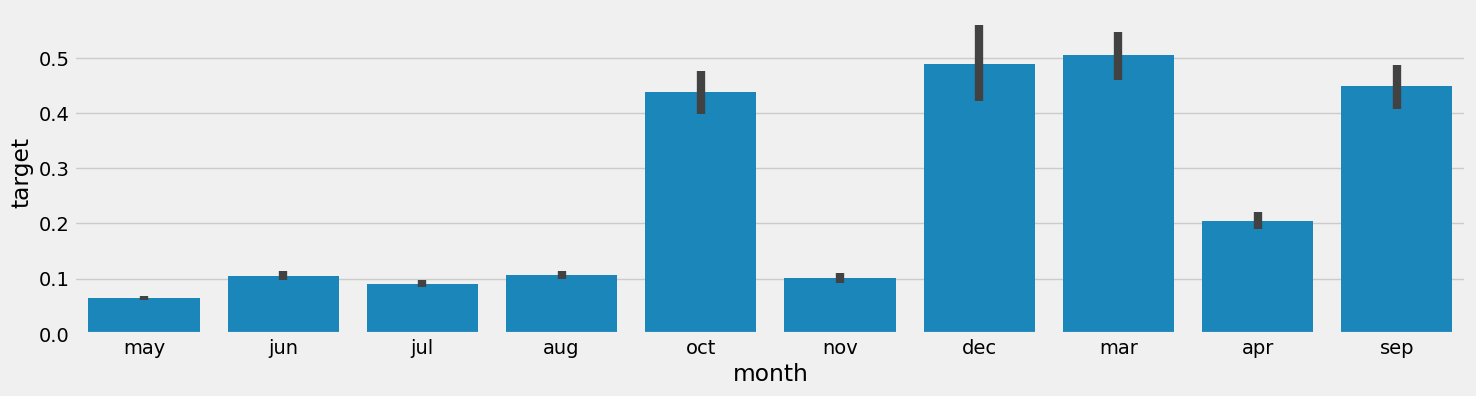

<Figure size 700x300 with 0 Axes>

In [27]:
barplot_mean('month', 'target', df)

### We are not able to see any monotonic trend here. One way to resolve this is to see if grouping them into quarters will help us find any signals.

In [28]:
qtr1 = ['jan', 'feb', 'mar']
qtr2 = ['apr', 'may', 'jun']
qtr3 = ['jul', 'aug', 'sep']
qtr4 = ['oct', 'nov', 'dec']

df['qtr'] = np.where(df['month'].isin(qtr1), 'Q1', 
                                       np.where(df['month'].isin(qtr2), 'Q2', 
                                       np.where(df['month'].isin(qtr3), 'Q3',
                                       np.where(df['month'].isin(qtr4), 'Q4', 0)
                                       )))
df['qtr'].value_counts()

qtr
Q2    21719
Q3    13922
Q4     5001
Q1      546
Name: count, dtype: int64

### `Q1` has the least amount of observation while `Q2` is the majority

### We will study the behavior of the target variable with respect to quarter

qtr
Q1    0.505495
Q2    0.091349
Q3    0.112053
Q4    0.163967
Name: target, dtype: float64


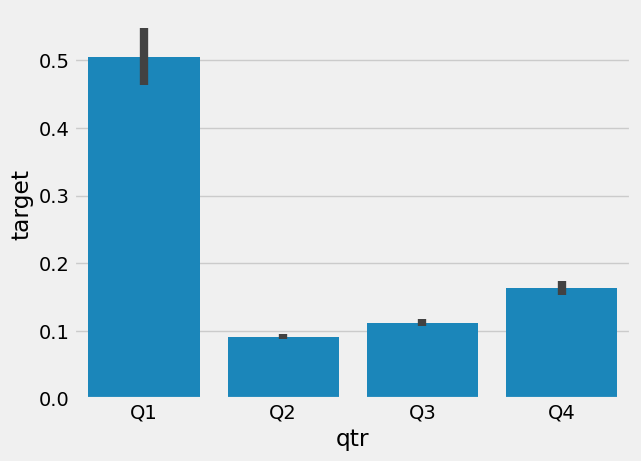

<Figure size 700x300 with 0 Axes>

In [29]:
barplot_mean('qtr', 'target', df, order=["Q1","Q2","Q3","Q4"])
# `order` as the name suggest orders the graph in similar fashion as the input list
# here we pass the order as per the quarters

### `Q1` is showing a likelihood of `50 %`. That is huge ! Of all the customers called in the start of the year, every second called customer will end up buying a term loan

### While building our strategy, we can inform the marketing team to invest their major efforts in the beginning of the year to get the best results.

### Arriving into `Q2`, there is a sharp decline in the interest of the customers. These may be the dry months for the marketing team. This can also support us building an effective strategy accordingly.

## Let us try combining `qtr` and other variable together.

qtr
Q1    0.505495
Q2    0.091349
Q3    0.112053
Q4    0.163967
Name: target, dtype: float64


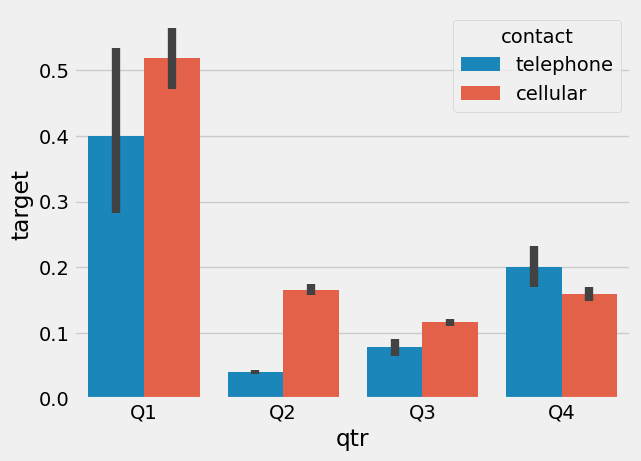

<Figure size 700x300 with 0 Axes>

In [30]:
barplot_mean('qtr', 'target', df, hue='contact', order=["Q1","Q2","Q3","Q4"])

### We have an interesting insight here ! `Q2` has a likelihood of `0.9%` but if you target the customers with `contact="cellular"`, your chances are very much better than `0.9%`

### We see an that `contact="cellular"` is leading most of the quarters except `Q4`. There might be some external factors at play here.

### We will try to look at the profiles of cellular customer across the quarters and their likelihood of purchasing the term loan

In [31]:
print('average likelihood across quarters')
df[df['contact'] == "cellular"].groupby('qtr')['target'].mean()

average likelihood across quarters


qtr
Q1    0.518519
Q2    0.165775
Q3    0.115961
Q4    0.158842
Name: target, dtype: float64

# 10. poutcome

poutcome
failure        0.142286
nonexistent    0.088322
success        0.651129
Name: target, dtype: float64


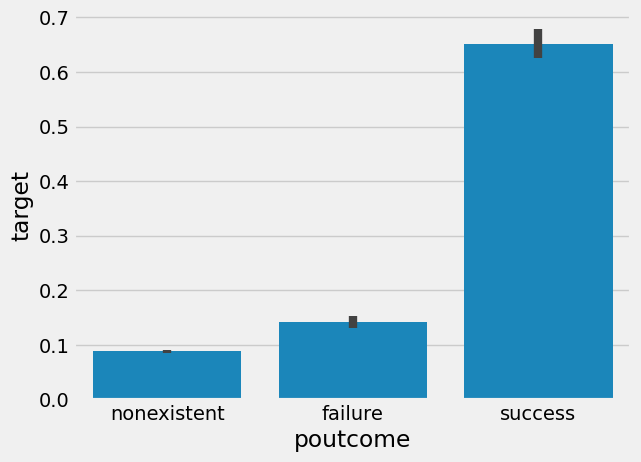

<Figure size 700x300 with 0 Axes>

In [32]:
barplot_mean('poutcome', 'target', df)

### This is a very good variable to design the audience which can be utilised later since it is able to discriminate the dependent target variable.
### Note: Customers who were a success earlier are `5 times` mre likely to buy the term loan than a person who was a failure

### We will also merge `nonexistent` and `failure` together

poutcome
0    0.094085
1    0.651129
Name: target, dtype: float64


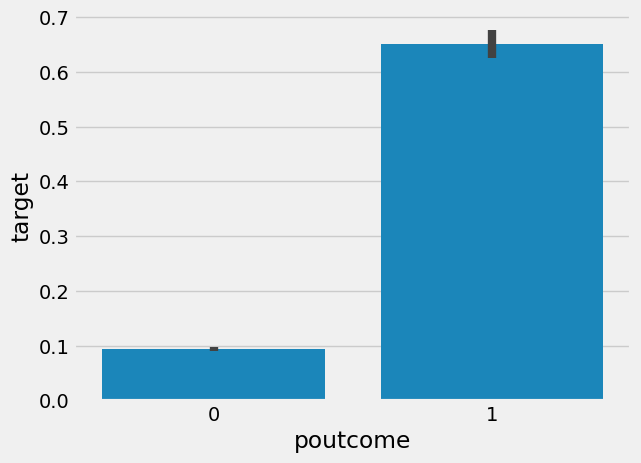

<Figure size 700x300 with 0 Axes>

In [33]:
df['poutcome'] = np.where(df['poutcome'].isin(['nonexistent', 'failure']), 0, 1)
barplot_mean('poutcome', 'target', df)

qtr
Q1    0.505495
Q2    0.091349
Q3    0.112053
Q4    0.163967
Name: target, dtype: float64


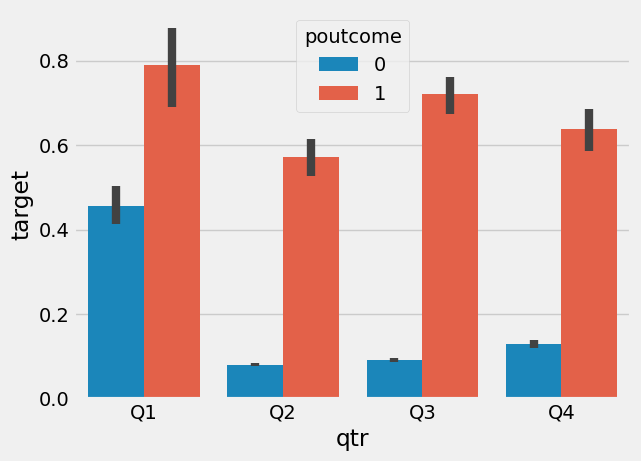

<Figure size 700x300 with 0 Axes>

In [34]:
barplot_mean('qtr', 'target', df, hue='poutcome', order=["Q1","Q2","Q3","Q4"])

In [35]:
df[df['poutcome'] == 1].groupby('qtr')['target'].mean()

# avg. likelihood across qtr
# Q1    0.505495
# Q2    0.091349
# Q3    0.112053
# Q4    0.163967

qtr
Q1    0.790123
Q2    0.571134
Q3    0.720174
Q4    0.638728
Name: target, dtype: float64

### We observe that when we combine `poutcome` and `quarter`. We will be able to build profiles that have 5-8 times better likelihood of success when compared to the no-model scenario. `Q3` has better chances than `Q4`

### The idea is as we have seen above that `Q2` and `Q3` are not favorable in comparison to `Q1` and `Q4`, but in the practical scenario we can't stop the team to run campaigns in `Q2` and `Q3`. So we are adding surrogate variables to boost their performance.

### Hope this notebook is useful 😄

# working with continous variables

### we will convert continuos variables into categories by binning them into ranks

# 11. age

In [36]:
df['age_rank'] = pd.qcut(df['age'].rank(method='first').values, 10, duplicates='drop').codes+1
df['age_rank'].value_counts()

# we have divided age into 5 ranks thery distributing 20% data in each rank
# we can now see if there is any trend with respect to age on target

age_rank
10    4119
5     4119
6     4119
1     4119
2     4119
9     4119
8     4119
3     4119
7     4118
4     4118
Name: count, dtype: int64

age_rank
1     0.169216
2     0.118475
3     0.098325
4     0.116319
5     0.086186
6     0.082544
7     0.085236
8     0.078660
9     0.098810
10    0.192765
Name: target, dtype: float64


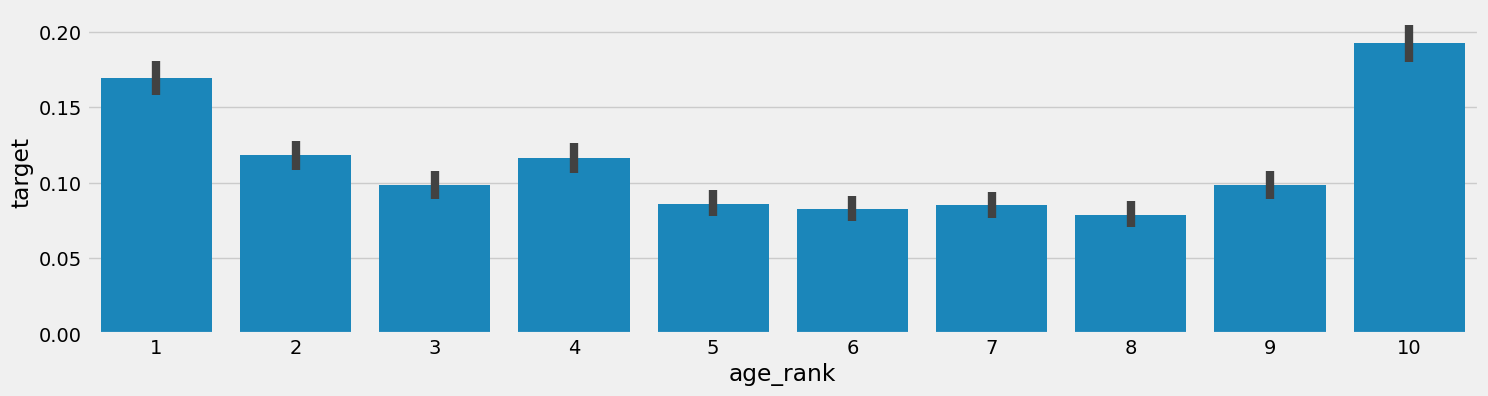

<Figure size 700x300 with 0 Axes>

In [37]:
barplot_mean('age_rank', 'target', df)

### we see that we have `U-shaped` curve. This variable might not help us discriminate the dependent variable. The prediction will be impacted

### let us try to combine this with `qtr`

age_rank
1     0.169216
2     0.118475
3     0.098325
4     0.116319
5     0.086186
6     0.082544
7     0.085236
8     0.078660
9     0.098810
10    0.192765
Name: target, dtype: float64


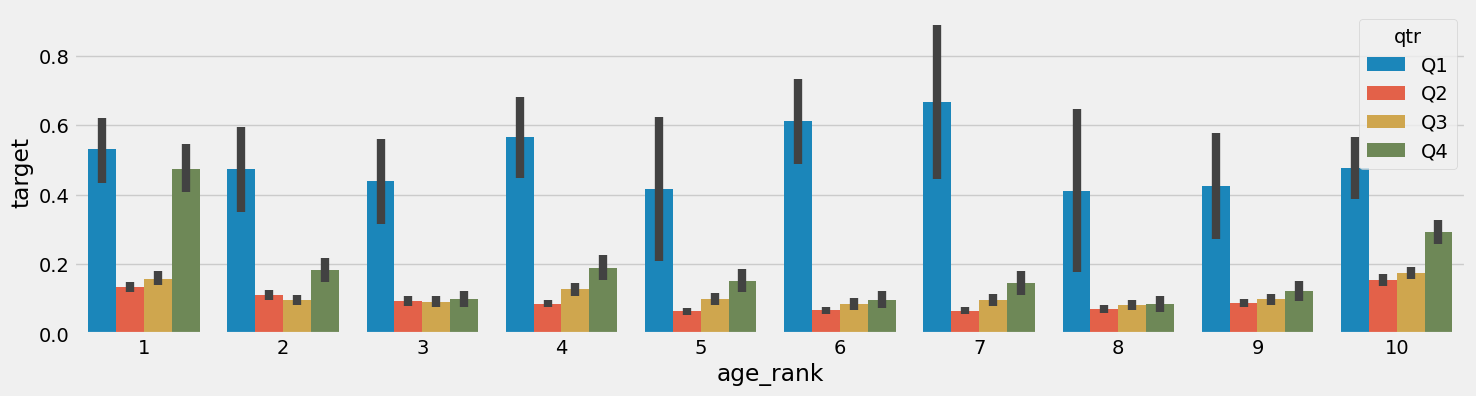

<Figure size 700x300 with 0 Axes>

In [38]:
barplot_mean('age_rank', 'target', df, hue='qtr', hue_order=["Q1","Q2","Q3","Q4"])

### As we can infer from this graph, `Q1` seems to stand out everytime as evident earlier since it has a likelihood of `50 %`

# 12. duration

In [39]:
df['duration_rank'] = pd.qcut(df['duration'].rank(method='first').values, 5, duplicates='drop').codes+1
df['duration_rank'].value_counts()

duration_rank
3    8238
5    8238
1    8238
4    8237
2    8237
Name: count, dtype: int64

duration_rank
1    0.004613
2    0.032051
3    0.072833
4    0.123831
5    0.329934
Name: target, dtype: float64


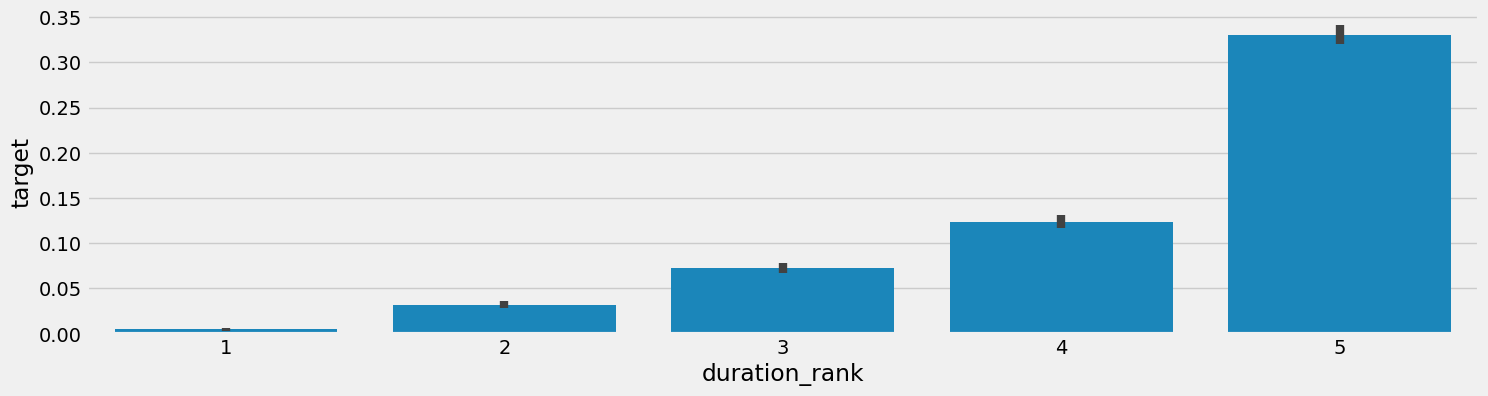

<Figure size 700x300 with 0 Axes>

In [40]:
barplot_mean('duration_rank', 'target', df)

### From the perspective of discrimination, we see a very strong positive trend. As the duration is increasing, the chances of buying the term loan is almost doubling. This will be an excellent predictor while using in the model

### But we have to be cautious of using `duration` because by definition `duration` is last contact duration, in seconds and we do not know the duration until a call is made.

### so we will move ahead

# 13. campaign

In [41]:
df['campaign_rank'] = pd.qcut(df['campaign'].rank(method='first').values, 10, duplicates='drop').codes+1
df['campaign_rank'].value_counts()

campaign_rank
1     4119
5     4119
9     4119
10    4119
8     4119
6     4119
2     4119
3     4119
7     4118
4     4118
Name: count, dtype: int64

campaign_rank
1     0.031561
2     0.055839
3     0.111678
4     0.211025
5     0.174557
6     0.064093
7     0.208354
8     0.072348
9     0.132799
10    0.064336
Name: target, dtype: float64


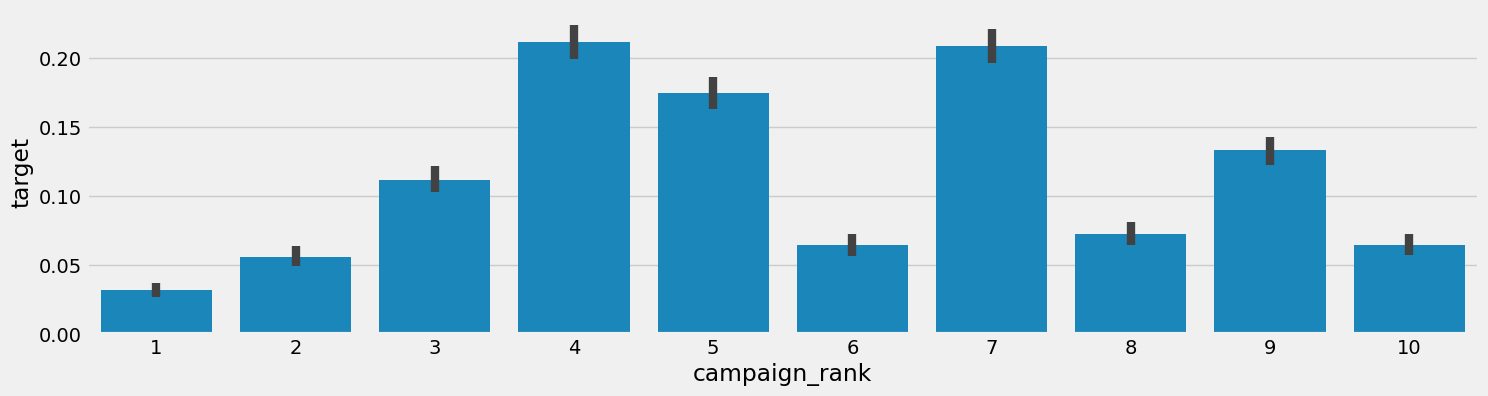

<Figure size 700x300 with 0 Axes>

In [42]:
barplot_mean('campaign_rank', 'target', df)

### this plot is showing a non-linear trend. Let us look at what kind of value does `campaign` takes ?

In [43]:
print(df.groupby('campaign_rank')['campaign'].min())
print("*"*30)
print(df.groupby('campaign_rank')['campaign'].mean())
print("*"*30)
print(df.groupby('campaign_rank')['campaign'].max())

campaign_rank
1     1
2     1
3     1
4     1
5     1
6     2
7     2
8     3
9     3
10    5
Name: campaign, dtype: int64
******************************
campaign_rank
1     1.000000
2     1.000000
3     1.000000
4     1.000000
5     1.716679
6     2.000000
7     2.150316
8     3.000000
9     4.063608
10    8.744841
Name: campaign, dtype: float64
******************************
campaign_rank
1      1
2      1
3      1
4      1
5      2
6      2
7      3
8      3
9      5
10    56
Name: campaign, dtype: int64


# 14. pdays

In [44]:
df['pdays_rank'] = pd.qcut(df['pdays'].rank(method='first').values, 10, duplicates='drop').codes+1
df['pdays_rank'].value_counts()

pdays_rank
1     4119
2     4119
3     4119
5     4119
6     4119
8     4119
9     4119
10    4119
4     4118
7     4118
Name: count, dtype: int64

pdays_rank
1     0.249090
2     0.033746
3     0.041029
4     0.057309
5     0.059723
6     0.057053
7     0.057795
8     0.155863
9     0.072348
10    0.342559
Name: target, dtype: float64


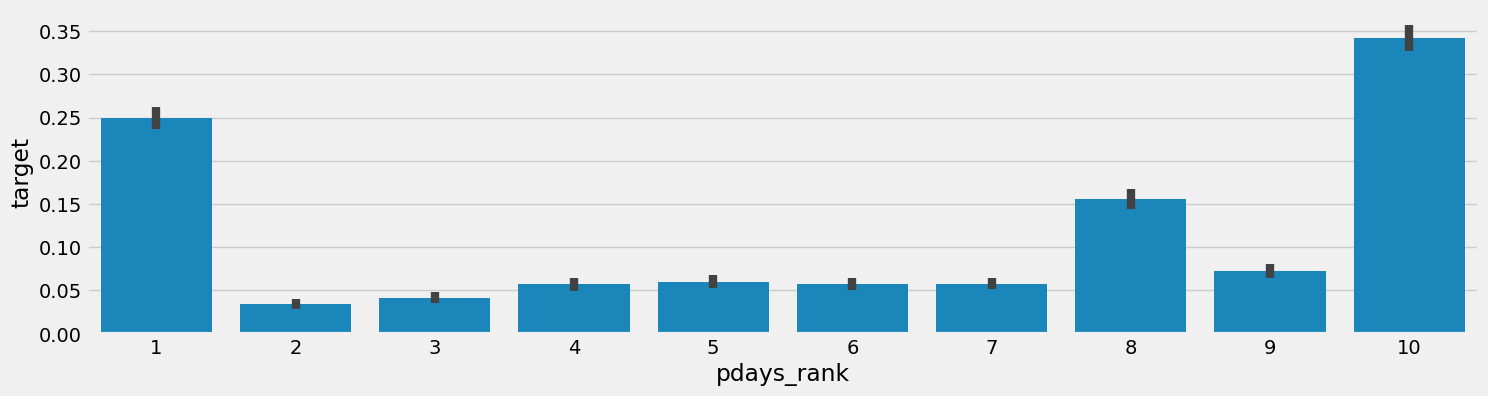

<Figure size 700x300 with 0 Axes>

In [45]:
barplot_mean('pdays_rank', 'target', df)

In [46]:
print(df.groupby('pdays_rank')['pdays'].min())
print("*"*30)
print(df.groupby('pdays_rank')['pdays'].mean())
print("*"*30)
print(df.groupby('pdays_rank')['pdays'].max())

pdays_rank
1       0
2     999
3     999
4     999
5     999
6     999
7     999
8     999
9     999
10    999
Name: pdays, dtype: int64
******************************
pdays_rank
1     633.772275
2     999.000000
3     999.000000
4     999.000000
5     999.000000
6     999.000000
7     999.000000
8     999.000000
9     999.000000
10    999.000000
Name: pdays, dtype: float64
******************************
pdays_rank
1     999
2     999
3     999
4     999
5     999
6     999
7     999
8     999
9     999
10    999
Name: pdays, dtype: int64


# 15. previous

In [47]:
df['prev_rank'] = pd.qcut(df['previous'].rank(method='first').values, 5, duplicates='drop').codes+1
df['prev_rank'].value_counts()

prev_rank
1    8238
3    8238
5    8238
2    8237
4    8237
Name: count, dtype: int64

prev_rank
1    0.031440
2    0.054267
3    0.058267
4    0.117154
5    0.302136
Name: target, dtype: float64


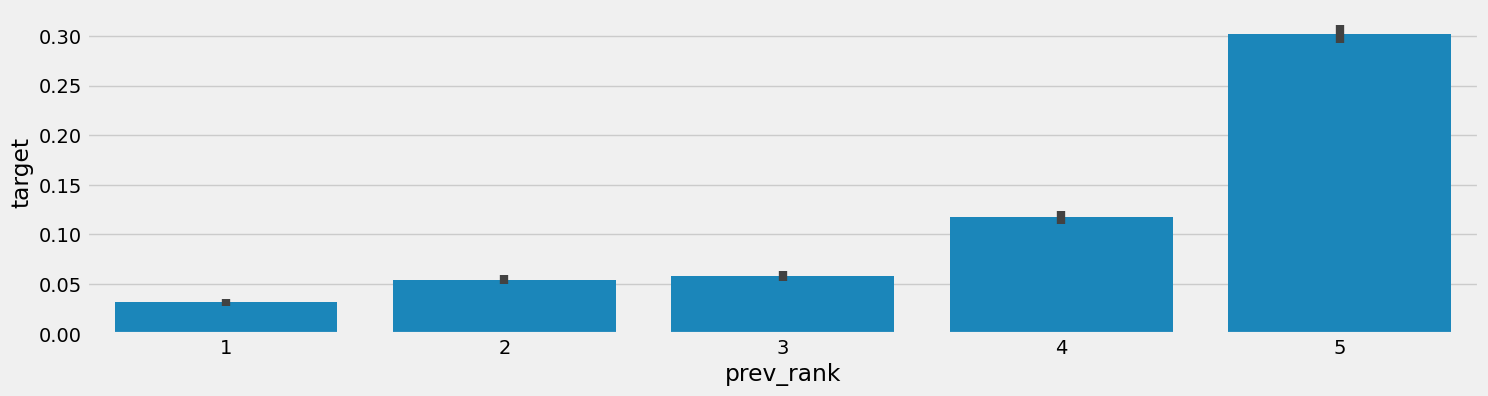

<Figure size 700x300 with 0 Axes>

In [48]:
barplot_mean('prev_rank', 'target', df)

### This is a very good variable to design the audience which can be utilised later since it is able to discriminate the dependent target variable.

prev_rank
1    0.031440
2    0.054267
3    0.058267
4    0.117154
5    0.302136
Name: target, dtype: float64


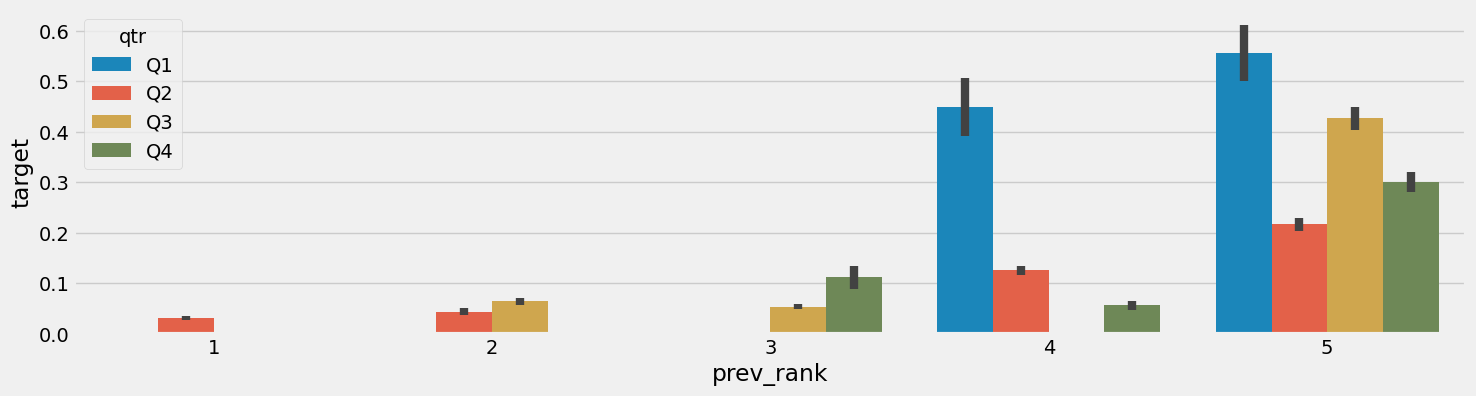

<Figure size 700x300 with 0 Axes>

In [49]:
barplot_mean('prev_rank', 'target', df, hue='qtr', hue_order=["Q1","Q2","Q3","Q4"])

# 16. emp.var.rate

emp.var.rate_rank
1    0.230396
2    0.193881
3    0.032289
4    0.052568
5    0.054139
Name: target, dtype: float64


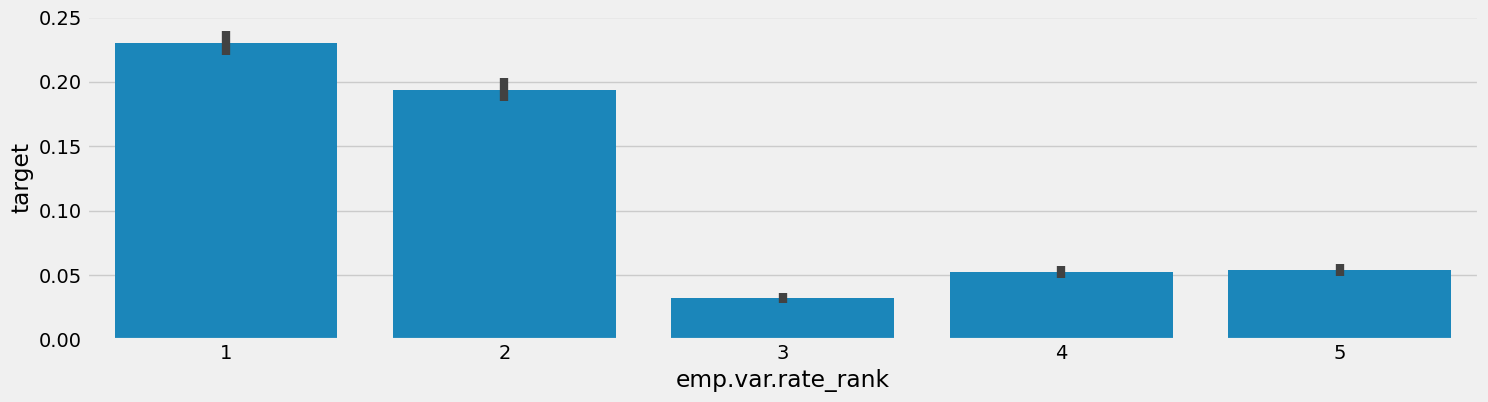

<Figure size 700x300 with 0 Axes>

In [50]:
df['emp.var.rate_rank'] = pd.qcut(df['emp.var.rate'].rank(method='first').values, 5, duplicates='drop').codes+1
barplot_mean('emp.var.rate_rank', 'target', df)

### This can behave as a good predictor in case of a decision tree since the lower ranks are capturing more and higher ranks are capturing less

# 17. cons.price.idx

cons.price.idx_rank
1    0.184511
2    0.136215
3    0.085700
4    0.038121
5    0.118718
Name: target, dtype: float64


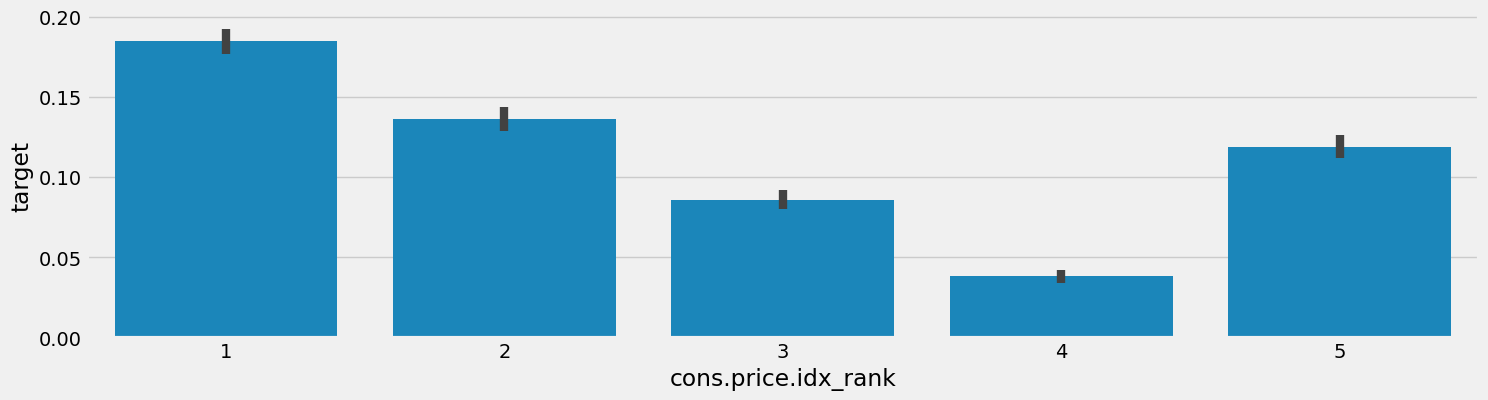

<Figure size 700x300 with 0 Axes>

In [51]:
df['cons.price.idx_rank'] = pd.qcut(df['cons.price.idx'].rank(method='first').values, 5, duplicates='drop').codes+1
barplot_mean('cons.price.idx_rank', 'target', df)

### We observe a strong slope from rank 1 to 4

# 18. cons.conf.idx

cons.conf.idx_rank
1    0.137776
2    0.068836
3    0.102088
4    0.082919
5    0.171644
Name: target, dtype: float64


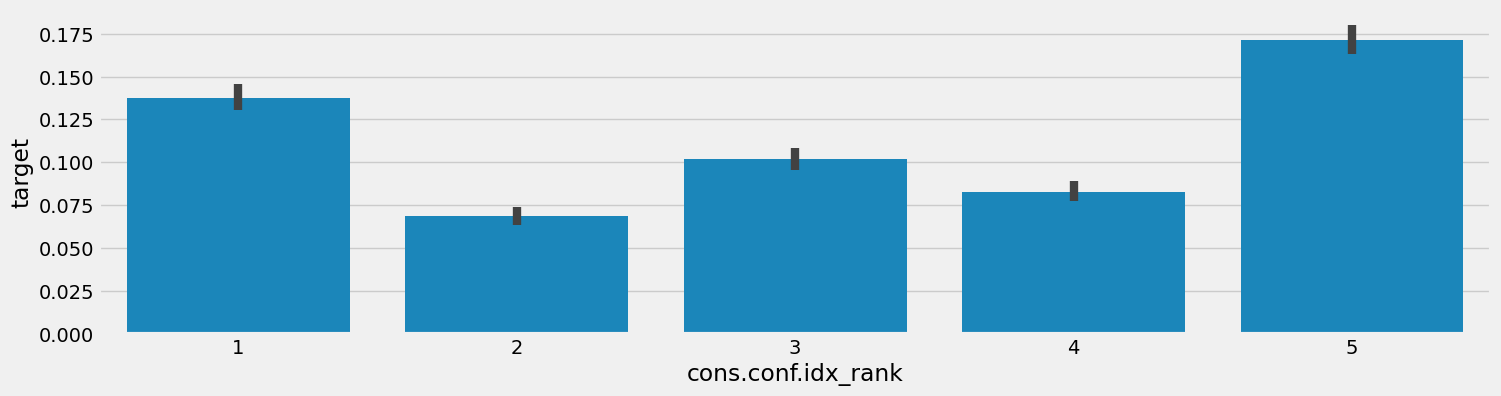

<Figure size 700x300 with 0 Axes>

In [52]:
df['cons.conf.idx_rank'] = pd.qcut(df['cons.conf.idx'].rank(method='first').values, 5, duplicates='drop').codes+1
barplot_mean('cons.conf.idx_rank', 'target', df)

### We observe that this is a very weak predictor

# 19.euribor3m

euribor3m_rank
1    0.308813
2    0.110113
3    0.034839
4    0.054389
5    0.055110
Name: target, dtype: float64


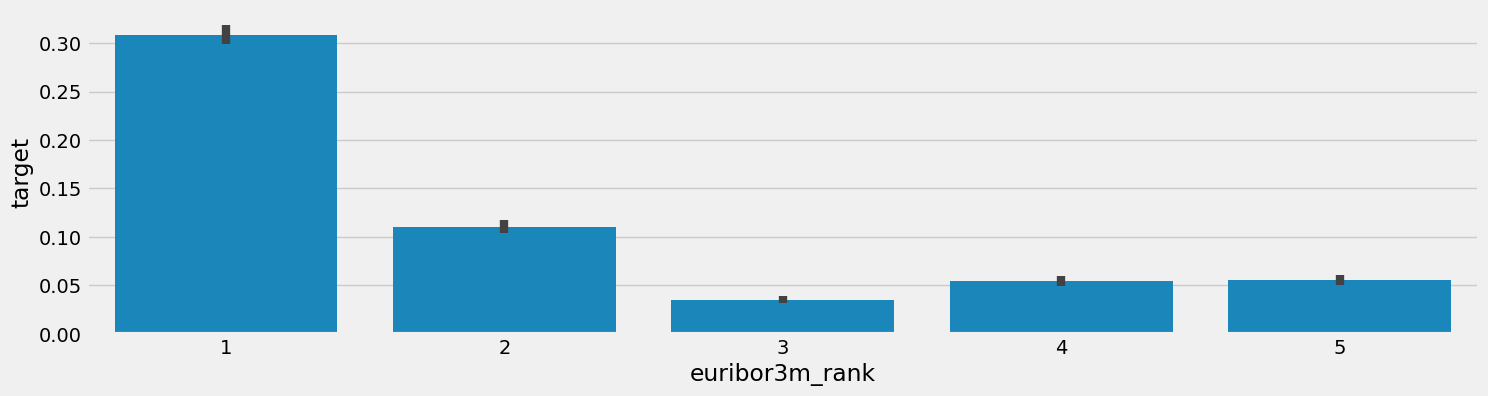

<Figure size 700x300 with 0 Axes>

In [53]:
df['euribor3m_rank'] = pd.qcut(df['euribor3m'].rank(method='first').values, 5, duplicates='drop').codes+1
barplot_mean('euribor3m_rank', 'target', df)

### We observe that this can used in a decision tree to make audiences

# 20.nr.employed

nr.employed_rank
1    0.346443
2    0.063008
3    0.047706
4    0.051961
5    0.054139
Name: target, dtype: float64


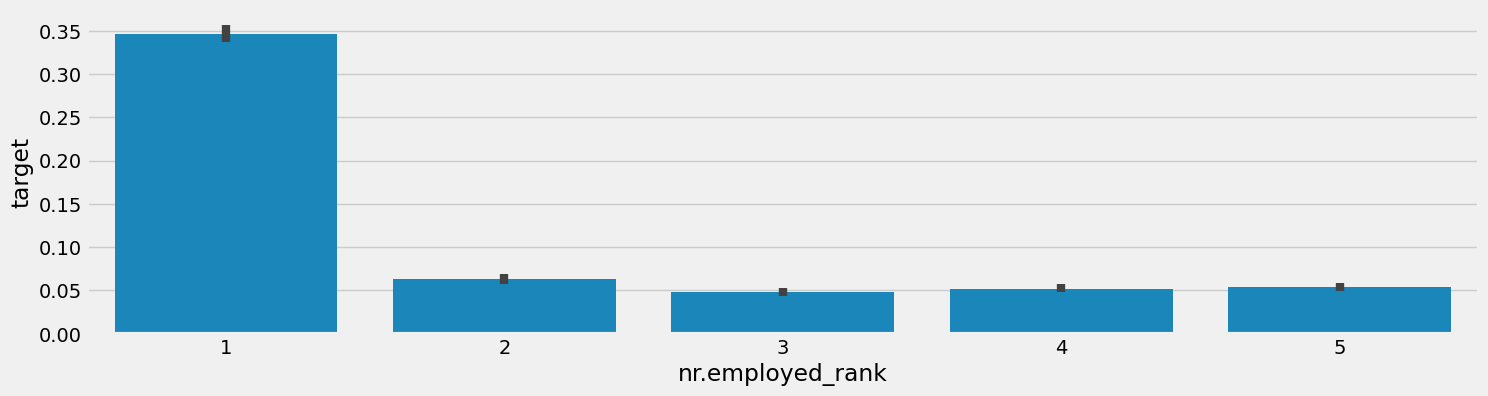

<Figure size 700x300 with 0 Axes>

In [54]:
df['nr.employed_rank'] = pd.qcut(df['nr.employed'].rank(method='first').values, 5, duplicates='drop').codes+1
barplot_mean('nr.employed_rank', 'target', df)

### We observe that this can used in a decision tree to make audiences. Let us kbreak it into 10 ranks instead of 5

nr.employed_rank
1     0.467346
2     0.225540
3     0.070163
4     0.055852
5     0.033261
6     0.062151
7     0.042496
8     0.061423
9     0.058995
10    0.049284
Name: target, dtype: float64


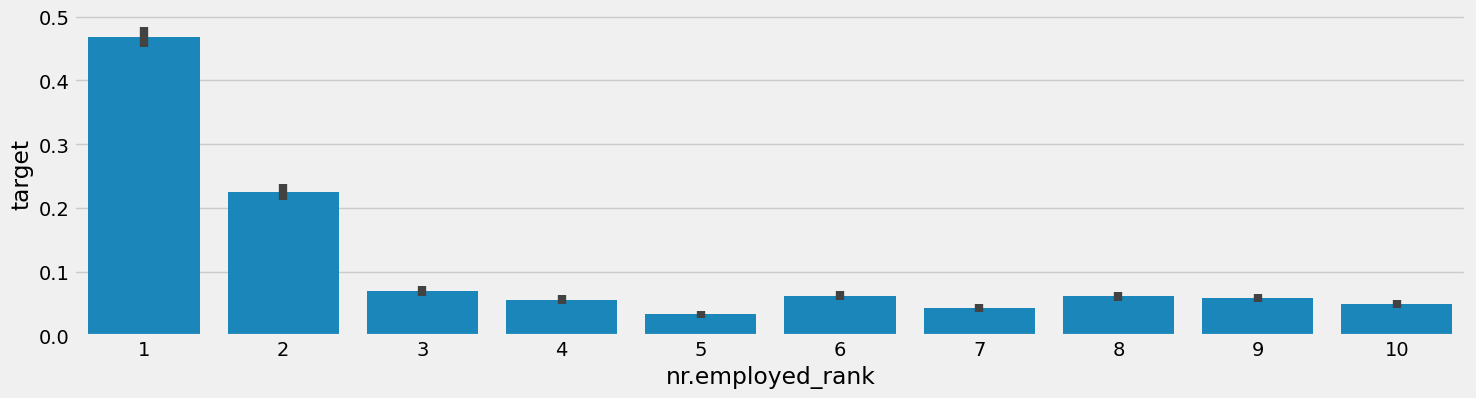

<Figure size 700x300 with 0 Axes>

In [55]:
df['nr.employed_rank'] = pd.qcut(df['nr.employed'].rank(method='first').values, 10, duplicates='drop').codes+1
barplot_mean('nr.employed_rank', 'target', df)

### We can see the behavior that rank 1 has now higher likelihood and the trend is going in a decreasing fashion. We can transform this to add a discrimatory slope by merging everything after the 3rd rank with itself

In [56]:
df['nr.employed_rank'] = np.where(df['nr.employed_rank'].isin(['1']), 'A', 
                                       np.where(df['nr.employed_rank'].isin(['2']), 'B', 'C'))
                                                                            
df['nr.employed_rank'].value_counts()

nr.employed_rank
C    41188
Name: count, dtype: int64

# Modelling

In [59]:
# We are not considering education, job, day_of_week, housing, loan
cols_cat = ['default', 'contact', 'poutcome', 'nr.employed_rank']

# We are not considering age, duration, cons.conf.idx 
cols_num = ['campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'euribor3m'] #, 'duration']

# NOTE: duration is added to improve the ROC score

In [60]:
# dummy encoding categorical variable
cols_cat_dummy = pd.get_dummies(df[cols_cat], drop_first=True)
cols_cat_dummy.head()

,poutcome,default_yes,contact_telephone
0,0,False,True
1,0,True,True
2,0,False,True
3,0,False,True
4,0,False,True


In [61]:
X_all = pd.concat([df[cols_num], cols_cat_dummy], axis=1, join='inner')
X_all.head()

,campaign,pdays,previous,emp.var.rate,cons.price.idx,euribor3m,poutcome,default_yes,contact_telephone
0,1,999,0,1.1,93.994,4.857,0,False,True
1,1,999,0,1.1,93.994,4.857,0,True,True
2,1,999,0,1.1,93.994,4.857,0,False,True
3,1,999,0,1.1,93.994,4.857,0,False,True
4,1,999,0,1.1,93.994,4.857,0,False,True


In [62]:
# Assigning X and Y
X = X_all
y = df['target']

# Splitting the data set

In [63]:
# Train-Val split 75-25
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=101, test_size=0.30)

print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(28831, 9) (12357, 9) (28831,) (12357,)


In [64]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

# TODO: Do a grid search to explore best parameters
dt = DecisionTreeClassifier(criterion="gini", random_state=101, max_depth=7, min_samples_leaf=5)
dt.fit(X_train, y_train)

rf_1000 = RandomForestClassifier(n_estimators=1000, random_state=101, criterion="gini", 
                                #  max_features=[.8], 
                                 max_depth=2)
rf_1000.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, n_estimators=1000, random_state=101)

# Prediction

In [65]:
y_pred = lr.predict(X_val)
print("Accuracy of logistic regression on test set {:.2f}".format(lr.score(X_val, y_val)))

Accuracy of logistic regression on test set 0.90


In [66]:
y_pred_tree = dt.predict(X_val)
print("Accuracy of decision tree on test set {:.2f}".format(dt.score(X_val, y_val)))

Accuracy of decision tree on test set 0.90


In [67]:
y_pred_rf = rf_1000.predict(X_val)
print("Accuracy of random forest on test set {:.2f}".format(rf_1000.score(X_val, y_val)))

Accuracy of random forest on test set 0.90


In [68]:
rf_1000_train_score = rf_1000.score(X_train, y_train)
rf_1000_test_score = rf_1000.score(X_val, y_val)


print("Training Score:", rf_1000_train_score)
print("Test Score:", rf_1000_test_score)

Training Score: 0.8987894974159759
Test Score: 0.8995710933074371


# Confusion Matrices -- Classification Reports

In [69]:
sns.set_style({'axes.grid' : False})
# logistic regression
# plot_confusion_matrix(lr, X_val, y_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     10978
           1       0.68      0.20      0.31      1379

    accuracy                           0.90     12357
   macro avg       0.79      0.59      0.63     12357
weighted avg       0.88      0.90      0.88     12357



In [70]:
# decision tree
print(classification_report(y_val, y_pred_tree))
# plot_confusion_matrix(dt, X_val, y_val)

              precision    recall  f1-score   support

           0       0.91      0.98      0.95     10978
           1       0.64      0.25      0.36      1379

    accuracy                           0.90     12357
   macro avg       0.78      0.62      0.65     12357
weighted avg       0.88      0.90      0.88     12357



In [71]:
# random forest
print(classification_report(y_val, y_pred_rf))
# plot_confusion_matrix(rf_1000, X_val, y_val)

              precision    recall  f1-score   support

           0       0.90      0.99      0.95     10978
           1       0.72      0.16      0.26      1379

    accuracy                           0.90     12357
   macro avg       0.81      0.58      0.61     12357
weighted avg       0.88      0.90      0.87     12357



# Plotting the ROC curves

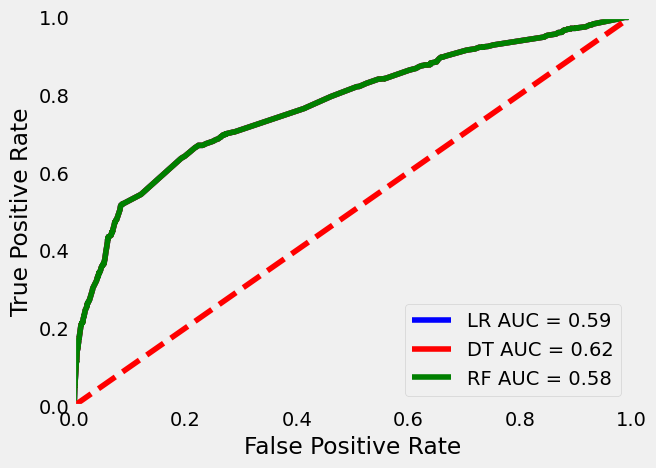

In [72]:
lr_roc_auc = roc_auc_score(y_val, lr.predict(X_val))
dt_roc_auc = roc_auc_score(y_val, dt.predict(X_val))
rf_roc_auc = roc_auc_score(y_val, rf_1000.predict(X_val))

fpr, tpr, thresholds = roc_curve(y_val, lr.predict_proba(X_val)[:, 1])
fpr, tpr, thresholds = roc_curve(y_val, dt.predict_proba(X_val)[:, 1])
fpr, tpr, thresholds = roc_curve(y_val, rf_1000.predict_proba(X_val)[:, 1])

plt.figure()

plt.plot(fpr, tpr, 'b', label = 'LR AUC = %0.2f' % lr_roc_auc)
plt.plot(fpr, tpr, 'r', label = 'DT AUC = %0.2f' % dt_roc_auc)
plt.plot(fpr, tpr, 'g', label = 'RF AUC = %0.2f' % rf_roc_auc)

plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
# plt.savefig('LR DT RF ROC Curve')
plt.show()

In [73]:
### The score is coming in the range of late 50s, lets try to improve the model by incorporating `duration`

### After using `duration`, we are able to get the score upto `0.77` for decision tree

# Making sense from the model - Lorenz curve

In [74]:
# Ranking the probabilities from the logistic regression model

y_pred_prob = lr.predict_proba(X)[:,1]
df['y_pred_P'] = pd.DataFrame(y_pred_prob)
df['P_rank'] = pd.qcut(df['y_pred_P'].rank(method='first').values, 10, duplicates='drop').codes+1
df.groupby('P_rank')['target'].mean()

# The highest rank has a likelihood of 48.28 percent (~ 4.3 times better than the average)

P_rank
1     0.037873
2     0.044914
3     0.044671
4     0.033997
5     0.064822
6     0.061908
7     0.053667
8     0.131585
9     0.194950
10    0.458121
Name: target, dtype: float64

In [75]:
# Ranking the probabilities from the logistic regression model

y_pred_prob_dtree = dt.predict_proba(X)[:,1]
df['y_pred_P_dtree'] = pd.DataFrame(y_pred_prob_dtree)
df['P_rank_dtree'] = pd.qcut(df['y_pred_P_dtree'].rank(method='first').values, 10, duplicates='drop').codes+1
df.groupby('P_rank_dtree')['target'].mean()

# The highest rank has a likelihood of 51.56 percent (~ 4.6 times better than the average)

P_rank_dtree
1     0.026463
2     0.031561
3     0.044914
4     0.042254
5     0.051469
6     0.058267
7     0.071394
8     0.076475
9     0.206846
10    0.516873
Name: target, dtype: float64

### From a discrimination point of view, decision tree is able to give a better likelihood

In [76]:
# df.to_csv('telemarketing_model_scored_file.csv')

In [78]:
import joblib as jb
jb.dump(dt, 'loan_status_model.joblib')

['loan_status_model.joblib']